# Looking at ESPRESSO mask

Tamar Ervin  

Date: August 2, 2021

- looking at the espresso mask to compare line depths to magnetic activity indicators

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tamar.tools.settings import Config, CsvDir, PlotDir
import tamar.tools.plotting_funcs as plot
import tamar.tools.utilities as utils

In [2]:
# relevant csv files
sdo_csv = os.path.join(CsvDir.NEID_CALC, 'rvs_from_fits.csv')
pickle_csv = os.path.join(CsvDir.CCFS, 'ccfs.csv')

Read in SDO calulations

In [3]:
date_jd, neid_dates, v_phot, v_conv, rv_model, rv_sun, rv_error, f, Bobs, f_bright, f_spot = utils.read_sdo_csv(sdo_csv)

In [4]:
mask_file = '/Users/tervin/NEID_Solar_analysis/NEIDcode/masks/G2_espresso.txt'

mask_file = '/Users/tervin/NEID_Solar_analysis/NEIDcode/masks/espresso+neid_mask_97_to_108.mas'
f = open(mask_file, "r")
lines = f.readlines()

wave, weight = [], []
for line in lines:
    wave.append(line.split(" ")[0])
    weight.append(line.split(" ")[1].strip())

Plot the espresso mask as a histogram.

In [42]:
# plt.hist(weight, bins=122)
# plt.title('Basic ESPRESSO Mask')
# plt.xlabel("Wavelength Bins")
# plt.ylabel('Mask Weight')



In [6]:
# read in data
# get CCFs and RVs from pickle file
fpickle = pd.read_pickle(pickle_csv)
dates = fpickle.dates.values
ccf_list = fpickle.ccf.values
rv_model = fpickle.rv_model.values
rv_error = fpickle.rv_error.values
gaussian = fpickle.gaussian.values
rv_gauss = fpickle.rv_gauss.values
Bobs = fpickle.Bobs.values

# find bad CCFs -- need to figure out why this is...
bad_ccfs = np.array([np.isnan(ccf[0]) for ccf in ccf_list])
ccf_list = ccf_list[~bad_ccfs]
rv_model = rv_model[~bad_ccfs]
rv_error = rv_error[~bad_ccfs]
gaussian = gaussian[~bad_ccfs]
rv_gauss = rv_gauss[~bad_ccfs]
Bobs = Bobs[~bad_ccfs]
dates = dates[~bad_ccfs]

# setup constants for CCF calculation
config = Config.config

In [7]:
# get rv sun
times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in dates]
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]
neid_dates = neid_dates[neid_inds]

ccf_inds = np.isin(times, neid_dates)
ccf_list = ccf_list[ccf_inds]
rv_model = rv_model[ccf_inds]
rv_error = rv_error[ccf_inds]
gaussian = gaussian[ccf_inds]
rv_gauss = rv_gauss[ccf_inds]
Bobs = Bobs[ccf_inds]
dates = dates[ccf_inds]

Get other gaussian parameters.

In [8]:
FWHM = [g.fwhm for g in gaussian]
amplitude = [g.amplitude for g in gaussian]
sigma = [g.stddev for g in gaussian]

# Plot the CCFs

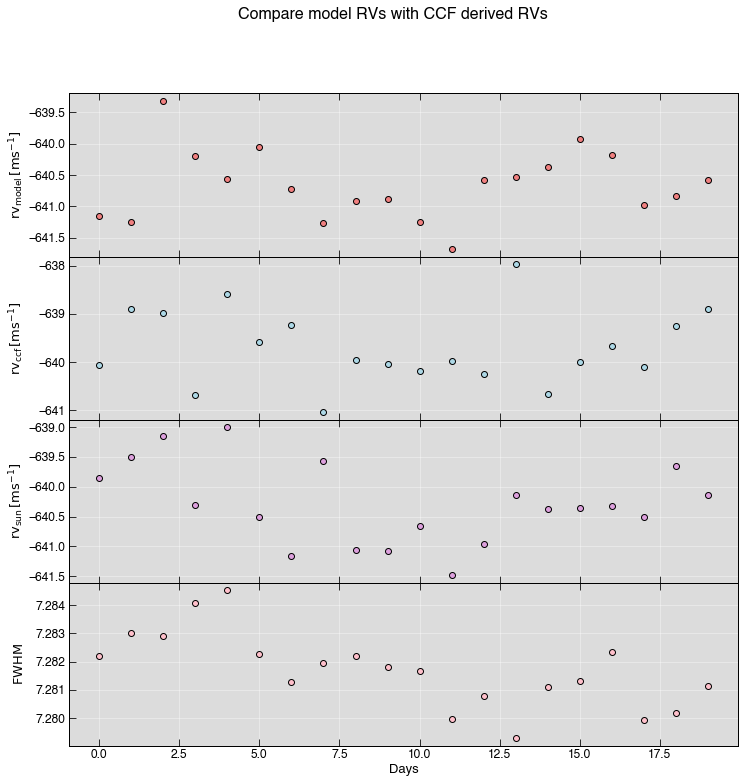

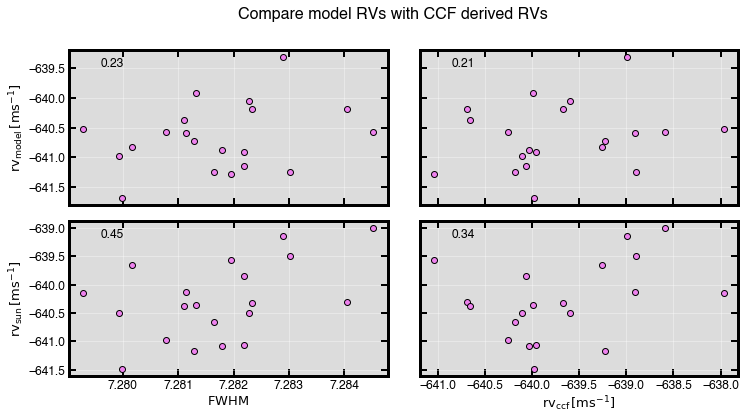

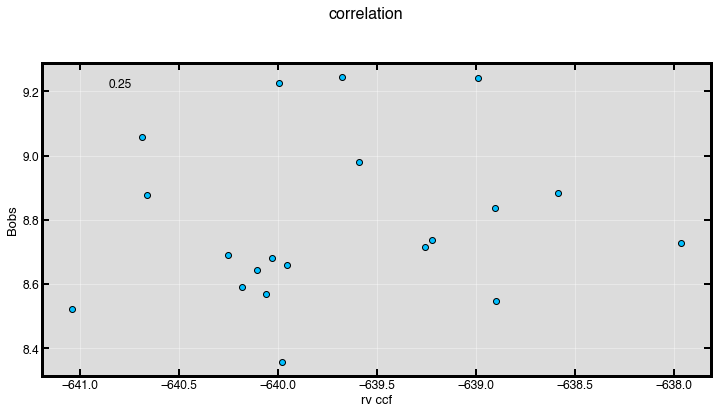

In [76]:
x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, FWHM]
title = 'Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm FWHM$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])

plot.correlation_plot(rv_gauss*1e3, Bobs, 'correlation', 'rv ccf', 'Bobs')

Get error percentage.

In [47]:
diff = rv_gauss*1e3 - rv_sun
print('Error:', np.abs(diff)/np.abs(rv_sun) * 100)

Error: [0.03309483 0.09355626 0.0250905  0.06106688 0.06470444 0.14147953
 0.30277347 0.23098235 0.17230618 0.16406696 0.07454144 0.23480274
 0.11097403 0.34028673 0.04427219 0.05740128 0.10095163 0.06190905
 0.06080648 0.19151947]


# Good weather cut

In [48]:
good_days = ['20201219', '20201220', '20210105',
 '20210115', '20210204',
 '20210218', '20210221', '20210222',
 '20210305']

pkl_inds = np.isin(dates, good_days)

In [49]:
times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in good_days]
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]

In [50]:
FWHM = np.array(FWHM)[pkl_inds]
Bobs = Bobs[pkl_inds]
rv_model = rv_model[pkl_inds]
rv_gauss = rv_gauss[pkl_inds]
dates = dates[pkl_inds]

In [51]:
print(dates)

['20201219' '20201220' '20210105' '20210115' '20210204' '20210218'
 '20210221' '20210222' '20210305']


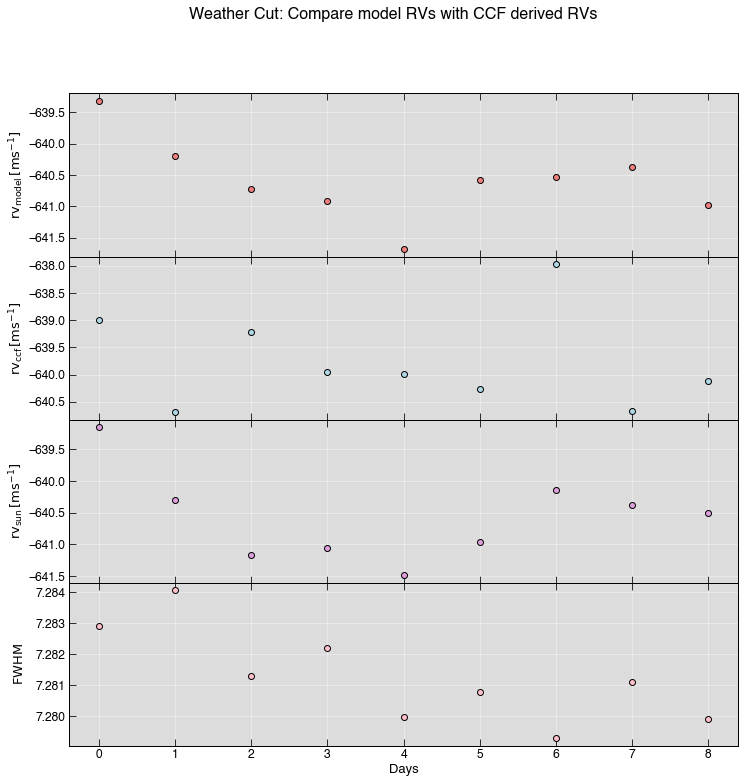

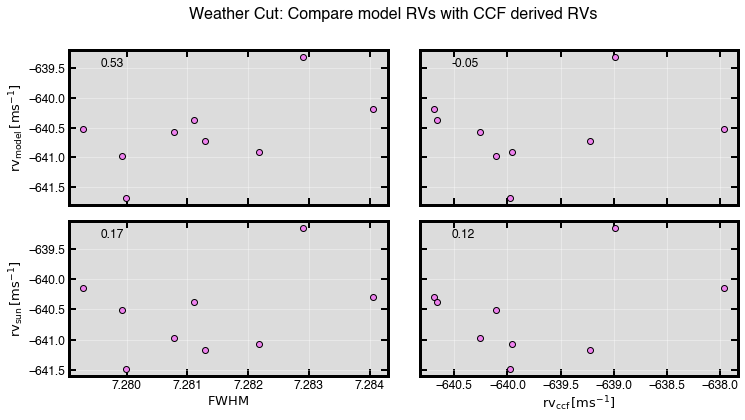

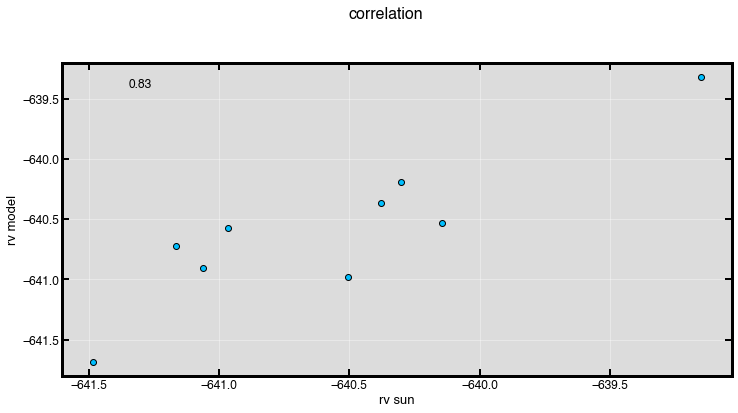

In [52]:
x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, FWHM]
title = 'Weather Cut: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm FWHM$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])

plot.correlation_plot(rv_sun, rv_model*1e3, 'correlation', 'rv sun', 'rv model')

# Creating New Masks

Text(0, 0.5, 'Binned Mask Weight')

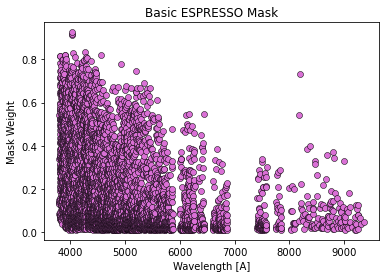

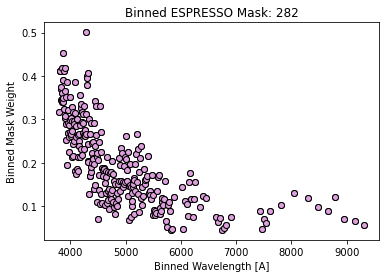

In [5]:
wave = [float(w) for w in wave]
weight = [float(w) for w in weight]

# basic mask plotting
plt.figure(0)
plt.scatter(wave, weight, color='orchid', edgecolors='k', linewidths=0.5)
plt.title('Basic ESPRESSO Mask')
plt.xlabel("Wavelength [A]")
plt.ylabel('Mask Weight')

# bin wavelengths
wave_binned, weight_binned = [], []
for i, w in enumerate(wave):
    if i%20 == 0:
        wave_binned.append(np.average(wave[i:i+20]))
        weight_binned.append(np.average(weight[i:i+20]))
plt.figure(1)
plt.scatter(wave_binned, weight_binned, color='plum', edgecolors='k', linewidths=1.0)
plt.title('Binned ESPRESSO Mask: ' + str(len(wave_binned)))
plt.xlabel("Binned Wavelength [A]")
plt.ylabel('Binned Mask Weight')

wave_binned, weight_binned = [], []
for i, w in enumerate(wave):
    if i%20 == 0:
        wave_binned.append(np.average(wave[i:i+20]))
        weight_binned.append(np.average(weight[i:i+20]))
plt.figure(1)
plt.scatter(wave_binned, weight_binned, color='plum', edgecolors='k', linewidths=1.0)
plt.title('Binned ESPRESSO Mask: ' + str(len(wave_binned)))
plt.xlabel("Binned Wavelength [A]")
plt.ylabel('Binned Mask Weight')

Apply clustering to the mask weights to find cutoffs.

Text(0.5, 1.0, 'Visualization of clustered mask weights')

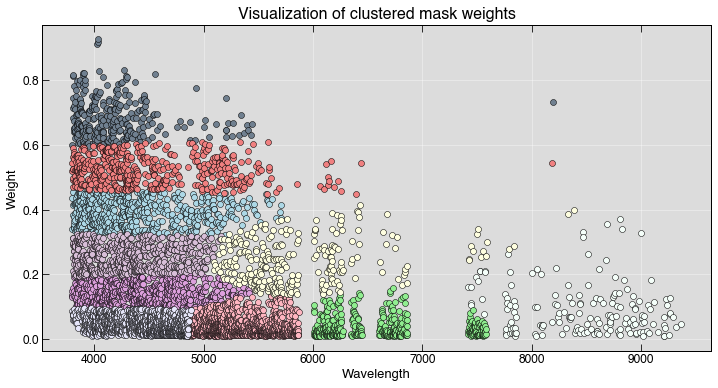

In [6]:
from sklearn.cluster import KMeans
CLUSTERS = 10
weight = np.array(weight)
wave = np.array(wave)
X = np.zeros((len(wave), 2))
X[:, 0] = (wave - np.nanmin(wave))/np.nanmax(wave)
X[:, 1] = (weight - np.nanmin(weight))/np.nanmax(weight)
kmeans = KMeans(n_clusters=CLUSTERS, random_state=0).fit(X)

plot_style = os.path.join(PlotDir.MPL, 'timeseries.mplstyle')
plt.style.use(plot_style)
plt.rcParams['figure.figsize'] = [12, 6]

color_list = ['lightblue', 'plum', 'lightpink', 'slategrey', 'thistle', 'mintcream', 'lavender', 'lightgreen',
              'lightyellow', 'lightcoral'] * 2
for i in range(CLUSTERS):
    plt.scatter(wave[kmeans.labels_ == i], weight[kmeans.labels_ == i],
                color=color_list[i], label='Cluster ' + str(i + 1), edgecolors='k', linewidths=0.5)


plt.xlabel('Wavelength')
plt.ylabel('Weight')
plt.title('Visualization of clustered mask weights', fontweight='bold')
# plt.legend()


Break up by weights.

Text(0, 0.5, 'Mask Weight')

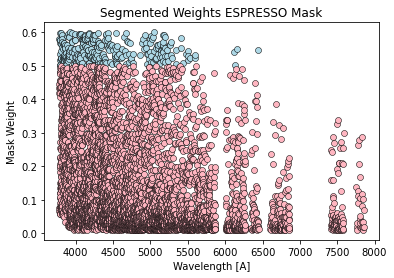

In [15]:
# make lists arrays
wave = np.array(wave)
weight = np.array(weight)

# make a high weight mask
new_mask = '/Users/tervin/NEID_Solar_analysis/NEIDcode/masks/56weights.txt'
wave_use = np.logical_and(weight >= 0.5, weight < 0.6)
weight_use = weight[wave_use]
wave_use = wave[wave_use]
X = np.zeros((len(wave_use), 2))
X[:, 0] = wave_use
X[:, 1] = weight_use
np.savetxt(new_mask, X, delimiter=" ", fmt="%s")

# make a low weight mask
new_mask = '/Users/tervin/NEID_Solar_analysis/NEIDcode/masks/below_weights.txt'
low = np.where(weight < 0.5)
low_wave = wave[low]
X = np.zeros((len(low_wave), 2))
X[:, 0] = low_wave
X[:, 1] = weight[low]
np.savetxt(new_mask, X, delimiter=" ", fmt="%s")

# plot this
plt.figure(0)
plt.scatter(wave_use, weight_use, color='lightblue', edgecolors='k', linewidths=0.5)
plt.scatter(low_wave, weight[low], color='lightpink', edgecolors='k', linewidths=0.5)
plt.title('Segmented Weights ESPRESSO Mask')
plt.xlabel("Wavelength [A]")
plt.ylabel('Mask Weight')

Fe I lines based on NIST database and Miklos paper.

In [83]:
# get list of FeI lines
fe_lines = os.path.join(CsvDir.ACTIVE, 'FeI_paper_lines.csv')
df = pd.read_csv(fe_lines)
fe_wave = df.obs_wvlnth.values
fe_wave = [float(fe) for fe in fe_wave]
# make new mask
new_mask = '/Users/tervin/NEID_Solar_analysis/NEIDcode/masks/FeI_lines.txt'
fe = np.isin(np.around(wave, 2), np.around(fe_wave, 2))
fe_wave = wave[fe]
X = np.zeros((len(fe_wave), 2))
X[:, 0] = fe_wave
X[:, 1] = weight[fe]
np.savetxt(new_mask, X, delimiter=" ", fmt="%s")

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

Active lines based on Wise 2018 paper.

In [65]:
# get list of active lines from Wise 2018
fe_lines = os.path.join(CsvDir.ACTIVE, 'wise_lines.csv')
df = pd.read_csv(fe_lines)
fe_wave = df.obs_wvlnth.values
fe_wave = [float(fe) for fe in fe_wave]

# make new mask
new_mask = '/Users/tervin/NEID_Solar_analysis/NEIDcode/masks/wise_lines.txt'
fe = np.isin(np.around(wave, 2), np.around(fe_wave, 2))
fe_wave = np.array(wave)[fe]
X = np.zeros((len(fe_wave), 2))
X[:, 0] = fe_wave
X[:, 1] = np.array(weight)[fe]
np.savetxt(new_mask, X, delimiter=" ", fmt="%s")

Non-active lines based on Altrock 1975 paper.

In [66]:
# get list of active lines from Wise 2018
non_active = os.path.join(CsvDir.ACTIVE, 'non_active_lines.csv')
df = pd.read_csv(non_active)
na_wave = df.wavelength.values
na_wave = [float(w) for w in na_wave]

# make new mask
new_mask = '/Users/tervin/NEID_Solar_analysis/NEIDcode/masks/non_active_lines.txt'
na = np.isin(np.around(wave, 2), np.around(na_wave, 2))
na_wave = np.array(wave)[na]
X = np.zeros((len(na_wave), 2))
X[:, 0] = na_wave
X[:, 1] = np.array(weight)[na]
np.savetxt(new_mask, X, delimiter=" ", fmt="%s")

# Plotting w Different Masks

NameError: name 'good_days' is not defined

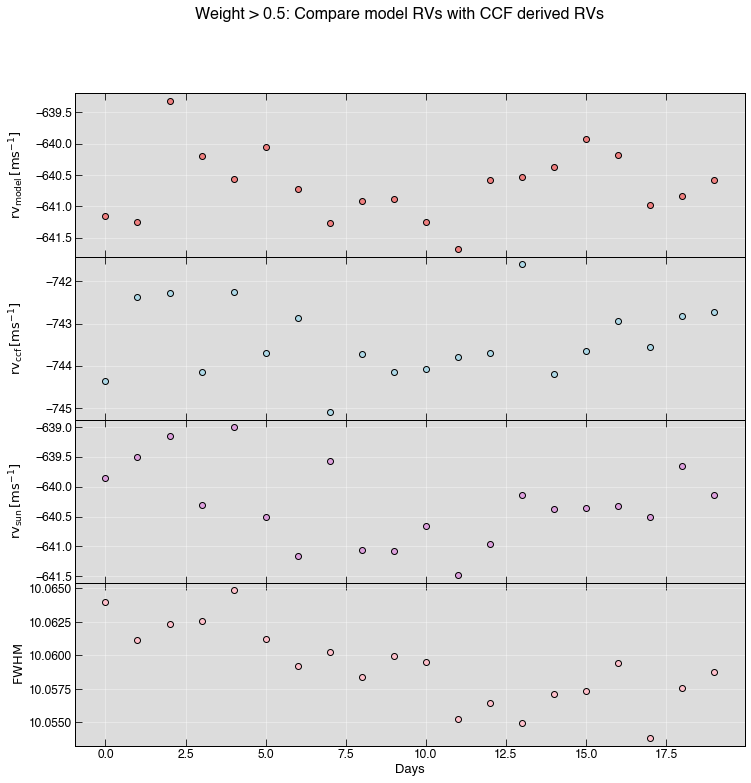

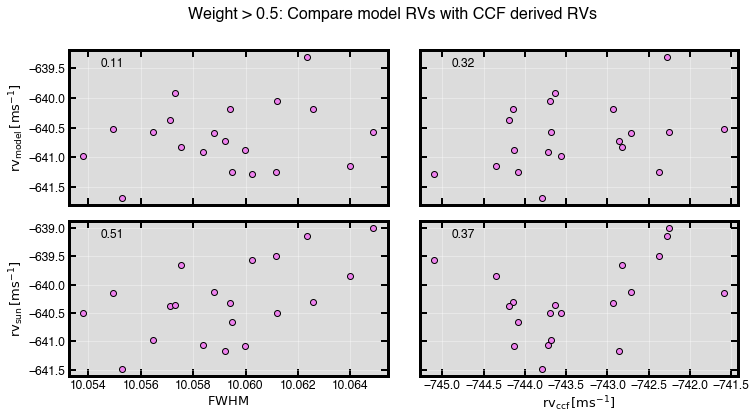

In [8]:
# get higher weighted orders
above = os.path.join(CsvDir.CCFS, 'above_weights.csv')
df = pd.read_pickle(above)
dates = df.dates.values
ccf_list = df.ccf.values
rv_model = df.rv_model.values
rv_error = df.rv_error.values
gaussian = df.gaussian.values
rv_gauss = df.rv_gauss.values
Bobs = df.Bobs.values

# find bad CCFs -- need to figure out why this is...
bad_ccfs = np.array([np.isnan(ccf[0]) for ccf in ccf_list])
ccf_list = ccf_list[~bad_ccfs]
rv_model = rv_model[~bad_ccfs]
rv_error = rv_error[~bad_ccfs]
gaussian = gaussian[~bad_ccfs]
rv_gauss = rv_gauss[~bad_ccfs]
Bobs = Bobs[~bad_ccfs]
dates = dates[~bad_ccfs]

# get rv sun
times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in dates]
date_jd, neid_dates, v_phot, v_conv, rv, rv_sun, error, f, B, f_bright, f_spot = utils.read_sdo_csv(sdo_csv)
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]
neid_dates = neid_dates[neid_inds]

ccf_inds = np.isin(times, neid_dates)
ccf_list = ccf_list[ccf_inds]
rv_model = rv_model[ccf_inds]
rv_error = rv_error[ccf_inds]
gaussian = gaussian[ccf_inds]
rv_gauss = rv_gauss[ccf_inds]
Bobs = Bobs[ccf_inds]
dates = dates[ccf_inds]

FWHM = [g.fwhm for g in gaussian]
amplitude = [g.amplitude for g in gaussian]
sigma = [g.stddev for g in gaussian]

x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, FWHM]
title = 'Weight > 0.5: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm FWHM$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])

# get good days
pkl_inds = np.isin(dates, good_days)

times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in good_days]
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]

FWHM = np.array(FWHM)[pkl_inds]
Bobs = Bobs[pkl_inds]
rv_model = rv_model[pkl_inds]
rv_gauss = rv_gauss[pkl_inds]
dates = dates[pkl_inds]

# plot good days
x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, Bobs]
title = 'Weight > 0.5 Weather Cut: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm B_{obs}\/\rm [G]$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])



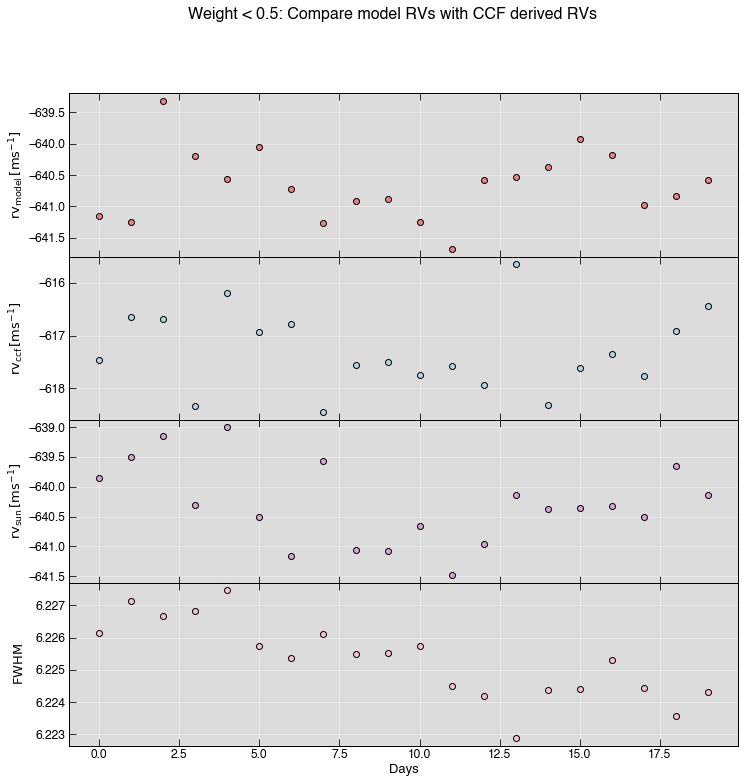

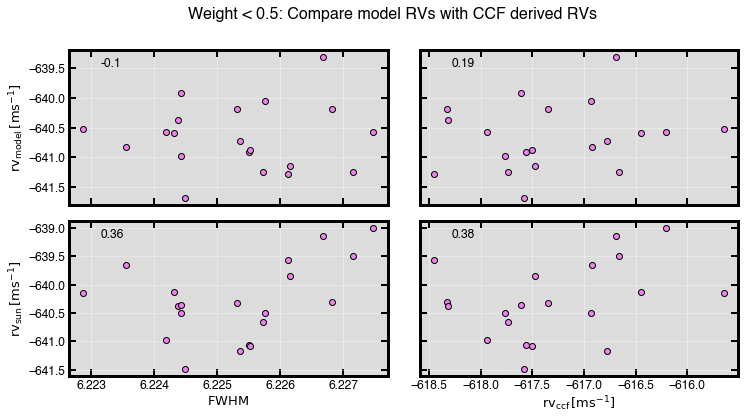

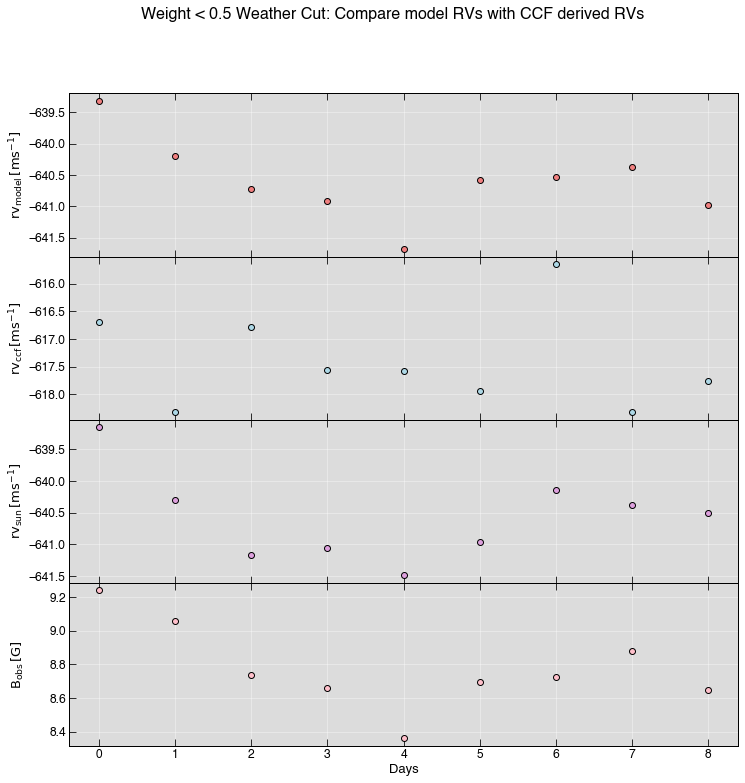

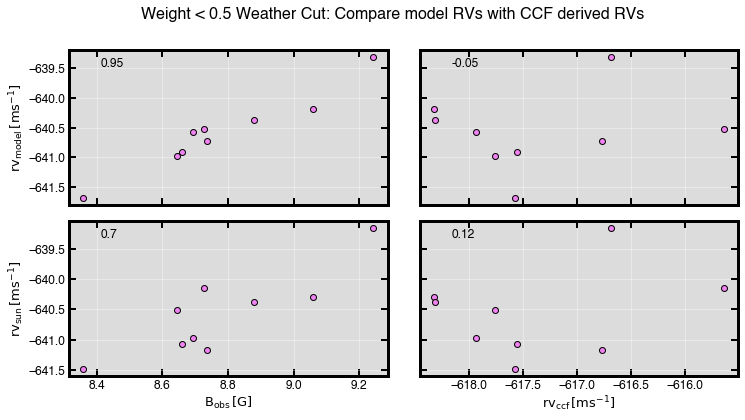

In [79]:
# get lower weighted orders
below = os.path.join(CsvDir.CCFS, 'below_weights.csv')
df = pd.read_pickle(below)
dates = df.dates.values
ccf_list = df.ccf.values
rv_model = df.rv_model.values
rv_error = df.rv_error.values
gaussian = df.gaussian.values
rv_gauss = df.rv_gauss.values
Bobs = df.Bobs.values

# find bad CCFs -- need to figure out why this is...
bad_ccfs = np.array([np.isnan(ccf[0]) for ccf in ccf_list])
ccf_list = ccf_list[~bad_ccfs]
rv_model = rv_model[~bad_ccfs]
rv_error = rv_error[~bad_ccfs]
gaussian = gaussian[~bad_ccfs]
rv_gauss = rv_gauss[~bad_ccfs]
Bobs = Bobs[~bad_ccfs]
dates = dates[~bad_ccfs]

# get rv sun
times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in dates]
date_jd, neid_dates, v_phot, v_conv, rv, rv_sun, error, f, B, f_bright, f_spot = utils.read_sdo_csv(sdo_csv)
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]
neid_dates = neid_dates[neid_inds]

ccf_inds = np.isin(times, neid_dates)
ccf_list = ccf_list[ccf_inds]
rv_model = rv_model[ccf_inds]
rv_error = rv_error[ccf_inds]
gaussian = gaussian[ccf_inds]
rv_gauss = rv_gauss[ccf_inds]
Bobs = Bobs[ccf_inds]
dates = dates[ccf_inds]

FWHM = [g.fwhm for g in gaussian]
amplitude = [g.amplitude for g in gaussian]
sigma = [g.stddev for g in gaussian]

x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, FWHM]
title = 'Weight < 0.5: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm FWHM$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])


# get good days
pkl_inds = np.isin(dates, good_days)

times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in good_days]
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]

FWHM = np.array(FWHM)[pkl_inds]
Bobs = Bobs[pkl_inds]
rv_model = rv_model[pkl_inds]
rv_gauss = rv_gauss[pkl_inds]
dates = dates[pkl_inds]

# plot good days
x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, Bobs]
title = 'Weight < 0.5 Weather Cut: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm B_{obs}\/\rm [G]$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])




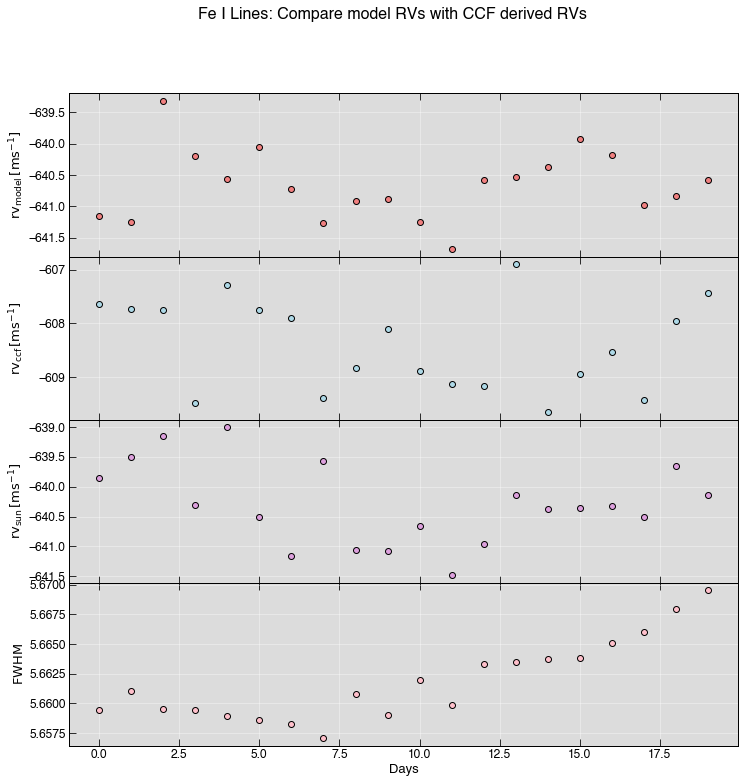

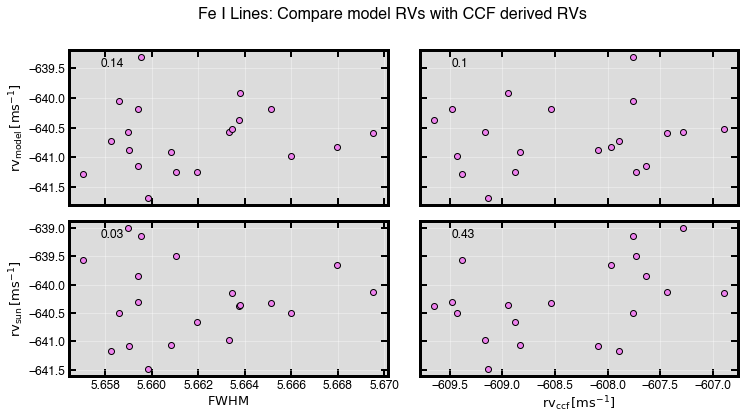

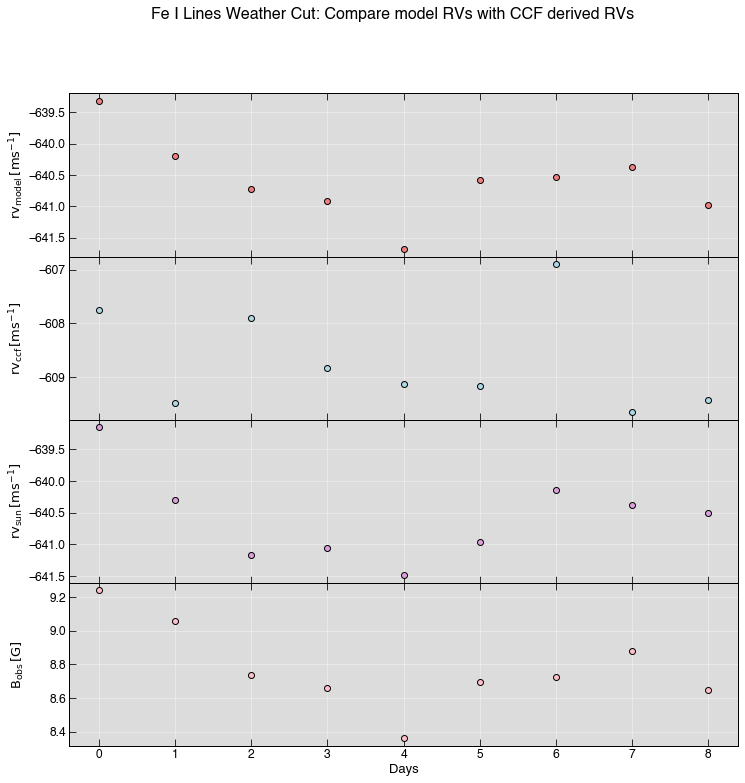

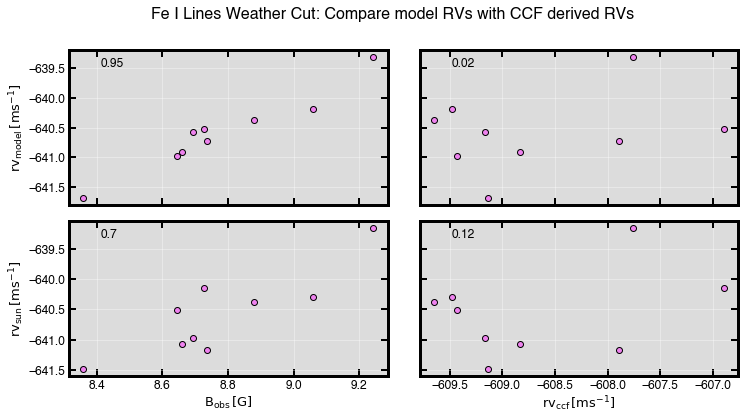

In [60]:
# get Fe I weighted orders
below = os.path.join(CsvDir.CCFS, 'FeI_lines.csv')
df = pd.read_pickle(below)
dates = df.dates.values
ccf_list = df.ccf.values
rv_model = df.rv_model.values
rv_error = df.rv_error.values
gaussian = df.gaussian.values
rv_gauss = df.rv_gauss.values
Bobs = df.Bobs.values

# find bad CCFs -- need to figure out why this is...
bad_ccfs = np.array([np.isnan(ccf[0]) for ccf in ccf_list])
ccf_list = ccf_list[~bad_ccfs]
rv_model = rv_model[~bad_ccfs]
rv_error = rv_error[~bad_ccfs]
gaussian = gaussian[~bad_ccfs]
rv_gauss = rv_gauss[~bad_ccfs]
Bobs = Bobs[~bad_ccfs]
dates = dates[~bad_ccfs]

# get rv sun
times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in dates]
date_jd, neid_dates, v_phot, v_conv, rv, rv_sun, error, f, B, f_bright, f_spot = utils.read_sdo_csv(sdo_csv)
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]
neid_dates = neid_dates[neid_inds]

ccf_inds = np.isin(times, neid_dates)
ccf_list = ccf_list[ccf_inds]
rv_model = rv_model[ccf_inds]
rv_error = rv_error[ccf_inds]
gaussian = gaussian[ccf_inds]
rv_gauss = rv_gauss[ccf_inds]
Bobs = Bobs[ccf_inds]
dates = dates[ccf_inds]

FWHM = [g.fwhm for g in gaussian]
amplitude = [g.amplitude for g in gaussian]
sigma = [g.stddev for g in gaussian]

x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, FWHM]
title = 'Fe I Lines: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm FWHM$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])
# get good days
pkl_inds = np.isin(dates, good_days)

times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in good_days]
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]

FWHM = np.array(FWHM)[pkl_inds]
Bobs = Bobs[pkl_inds]
rv_model = rv_model[pkl_inds]
rv_gauss = rv_gauss[pkl_inds]
dates = dates[pkl_inds]

# plot good days
x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, Bobs]
title = 'Fe I Lines Weather Cut: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm B_{obs}\/\rm [G]$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])



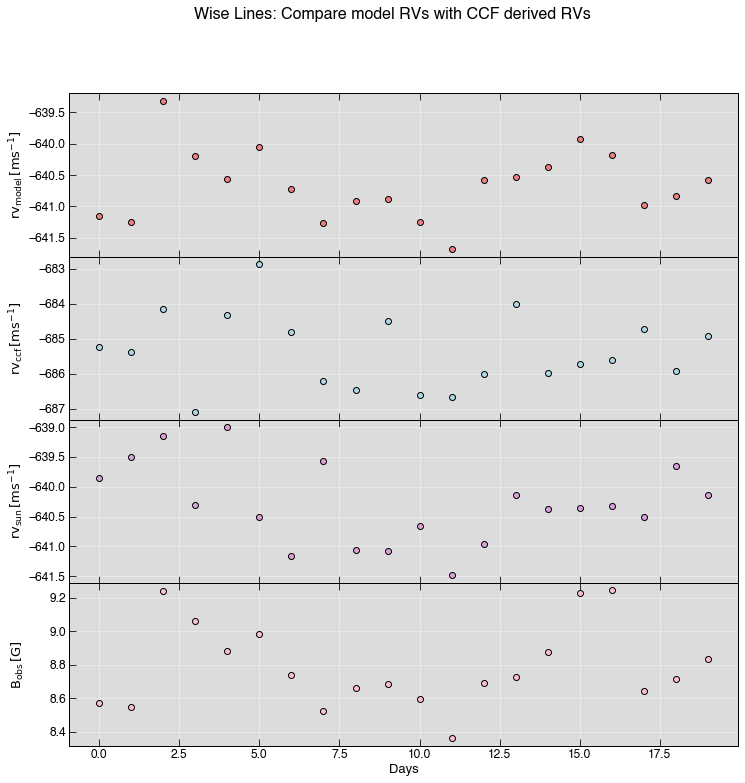

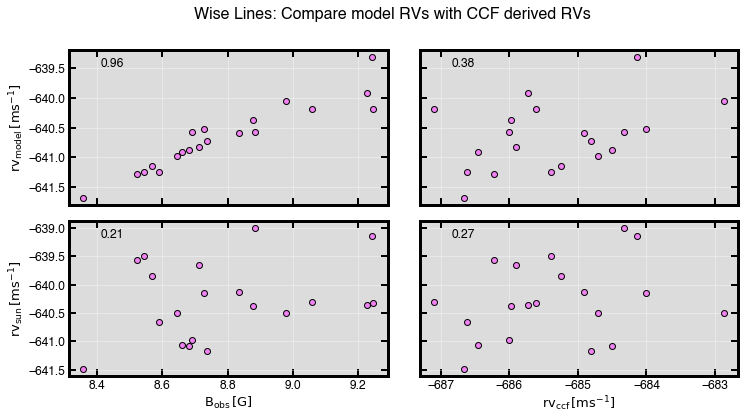

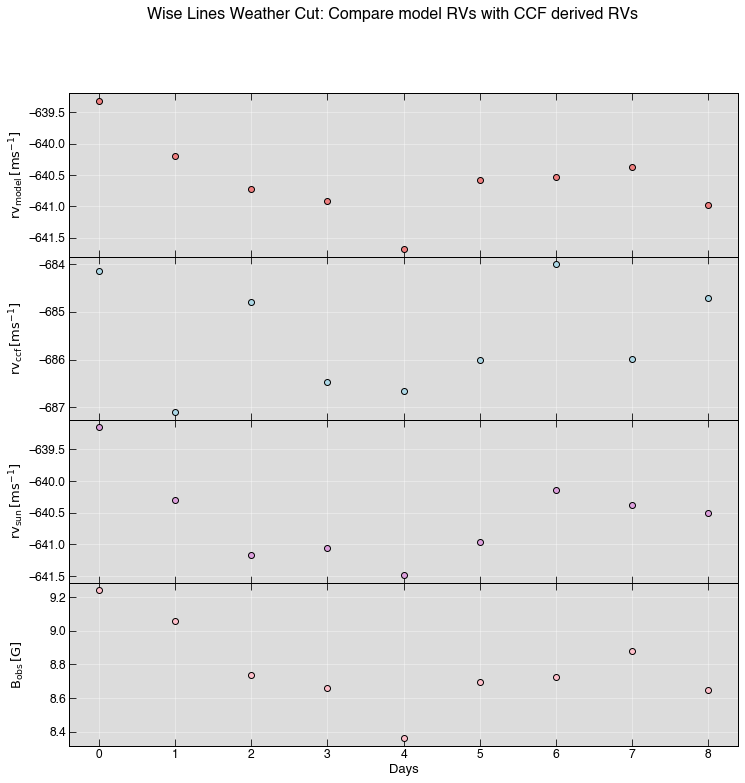

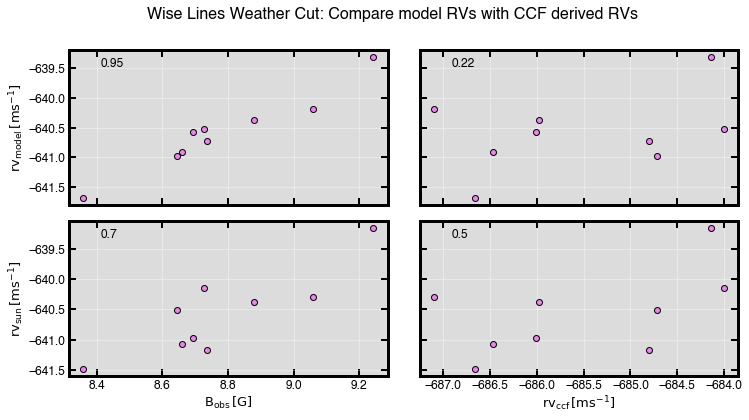

In [61]:
# get Wise lines weighted orders
below = os.path.join(CsvDir.CCFS, 'wise_lines.csv')
df = pd.read_pickle(below)
dates = df.dates.values
ccf_list = df.ccf.values
rv_model = df.rv_model.values
rv_error = df.rv_error.values
gaussian = df.gaussian.values
rv_gauss = df.rv_gauss.values
Bobs = df.Bobs.values

# find bad CCFs -- need to figure out why this is...
bad_ccfs = np.array([np.isnan(ccf[0]) for ccf in ccf_list])
ccf_list = ccf_list[~bad_ccfs]
rv_model = rv_model[~bad_ccfs]
rv_error = rv_error[~bad_ccfs]
gaussian = gaussian[~bad_ccfs]
rv_gauss = rv_gauss[~bad_ccfs]
Bobs = Bobs[~bad_ccfs]
dates = dates[~bad_ccfs]

# get rv sun
times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in dates]
date_jd, neid_dates, v_phot, v_conv, rv, rv_sun, error, f, B, f_bright, f_spot = utils.read_sdo_csv(sdo_csv)
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]
neid_dates = neid_dates[neid_inds]

ccf_inds = np.isin(times, neid_dates)
ccf_list = ccf_list[ccf_inds]
rv_model = rv_model[ccf_inds]
rv_error = rv_error[ccf_inds]
gaussian = gaussian[ccf_inds]
rv_gauss = rv_gauss[ccf_inds]
Bobs = Bobs[ccf_inds]
dates = dates[ccf_inds]

FWHM = [g.fwhm for g in gaussian]
amplitude = [g.amplitude for g in gaussian]
sigma = [g.stddev for g in gaussian]

x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, Bobs]
title = 'Wise Lines: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm B_{obs}\/\rm [G]$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])


# get good days
pkl_inds = np.isin(dates, good_days)

times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in good_days]
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]

FWHM = np.array(FWHM)[pkl_inds]
Bobs = Bobs[pkl_inds]
rv_model = rv_model[pkl_inds]
rv_gauss = rv_gauss[pkl_inds]
dates = dates[pkl_inds]

# plot good days
x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, Bobs]
title = 'Wise Lines Weather Cut: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm B_{obs}\/\rm [G]$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])


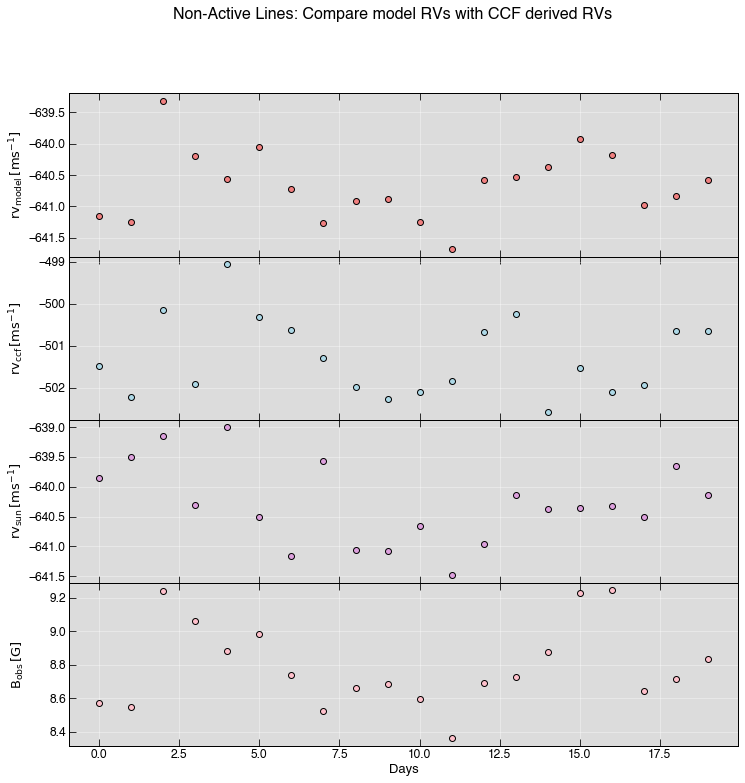

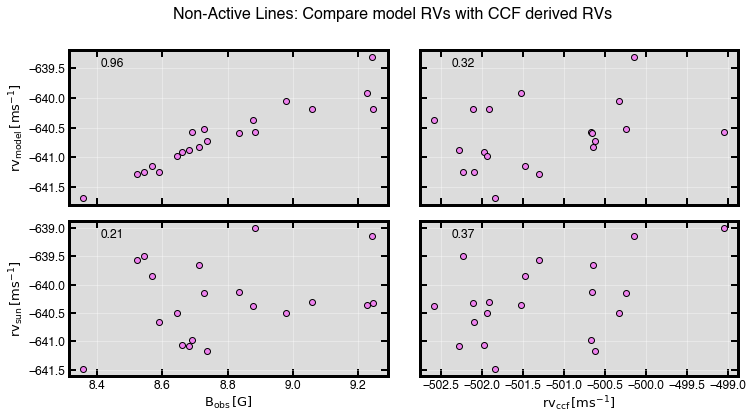

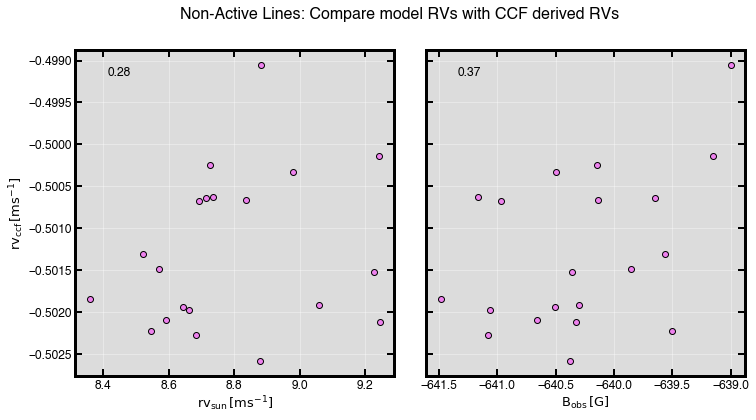

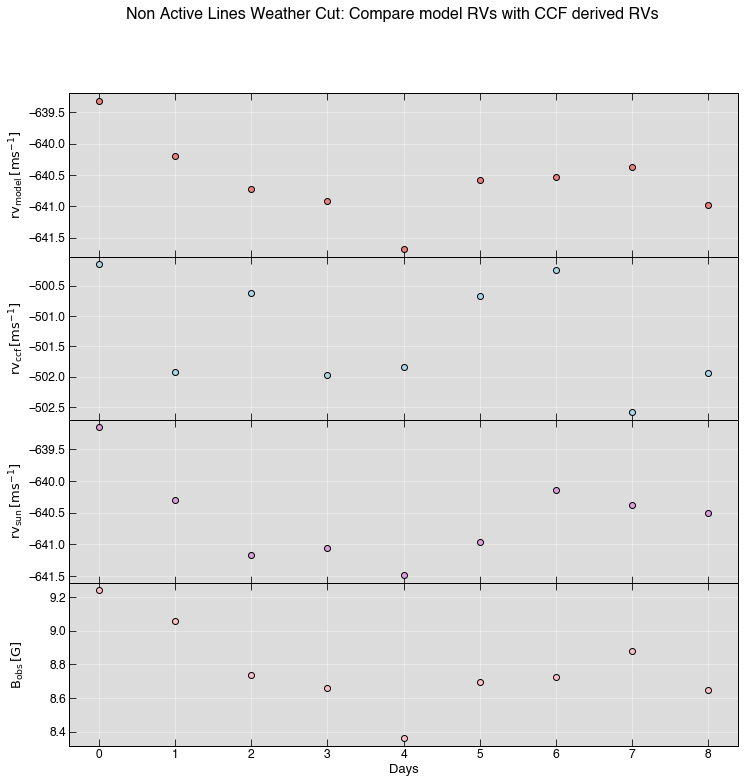

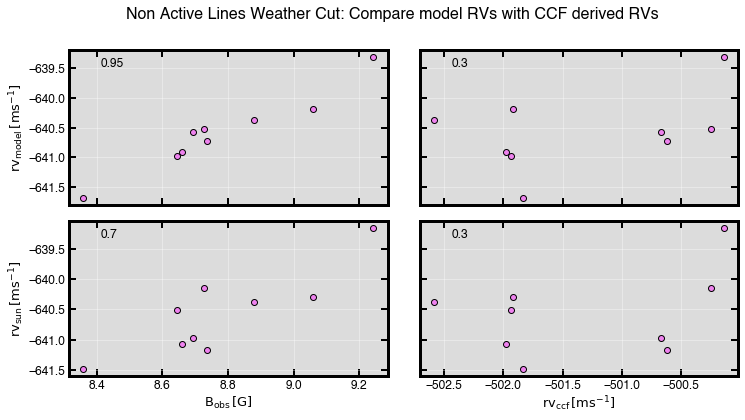

In [68]:

# get Wise lines weighted orders
below = os.path.join(CsvDir.CCFS, 'non_active_lines.csv')
df = pd.read_pickle(below)
dates = df.dates.values
ccf_list = df.ccf.values
rv_model = df.rv_model.values
rv_error = df.rv_error.values
gaussian = df.gaussian.values
rv_gauss = df.rv_gauss.values
Bobs = df.Bobs.values

# find bad CCFs -- need to figure out why this is...
bad_ccfs = np.array([np.isnan(ccf[0]) for ccf in ccf_list])
ccf_list = ccf_list[~bad_ccfs]
rv_model = rv_model[~bad_ccfs]
rv_error = rv_error[~bad_ccfs]
gaussian = gaussian[~bad_ccfs]
rv_gauss = rv_gauss[~bad_ccfs]
Bobs = Bobs[~bad_ccfs]
dates = dates[~bad_ccfs]

# get rv sun
times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in dates]
date_jd, neid_dates, v_phot, v_conv, rv, rv_sun, error, f, B, f_bright, f_spot = utils.read_sdo_csv(sdo_csv)
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]
neid_dates = neid_dates[neid_inds]

ccf_inds = np.isin(times, neid_dates)
ccf_list = ccf_list[ccf_inds]
rv_model = rv_model[ccf_inds]
rv_error = rv_error[ccf_inds]
gaussian = gaussian[ccf_inds]
rv_gauss = rv_gauss[ccf_inds]
Bobs = Bobs[ccf_inds]
dates = dates[ccf_inds]

FWHM = [g.fwhm for g in gaussian]
amplitude = [g.amplitude for g in gaussian]
sigma = [g.stddev for g in gaussian]

x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, Bobs]
title = 'Non-Active Lines: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm B_{obs}\/\rm [G]$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])

plot.two_correlation_plots([Bobs, rv_sun], rv_gauss, title, [r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm B_{obs}\/\rm [G]$'], r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$')
# get good days
pkl_inds = np.isin(dates, good_days)

times = [str(d)[0:4] + "-" + str(d)[4:6] + '-' + str(d)[6:8] + 'T12:00:00' for d in good_days]
neid_inds = np.isin(neid_dates, times)
rv_sun = rv_sun[neid_inds]

FWHM = np.array(FWHM)[pkl_inds]
Bobs = Bobs[pkl_inds]
rv_model = rv_model[pkl_inds]
rv_gauss = rv_gauss[pkl_inds]
dates = dates[pkl_inds]

# plot good days
x = range(len(dates))
y_list = [rv_model*1e3, rv_gauss*1e3, rv_sun, Bobs]
title = 'Non Active Lines Weather Cut: Compare model RVs with CCF derived RVs'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm model}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$', r'$\rm rv_{\rm sun}\/\rm [m s^{-1}]$', r'$\rm B_{obs}\/\rm [G]$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

plot.four_correlation_plots([y_list[3], y_list[1]], [y_list[0], y_list[2]], title, [ylabel_list[3], ylabel_list[1]],
                                                      [ylabel_list[0], ylabel_list[2]])



# CCF v. NEID Pipeline RVs for April 14, 2021 (CME)

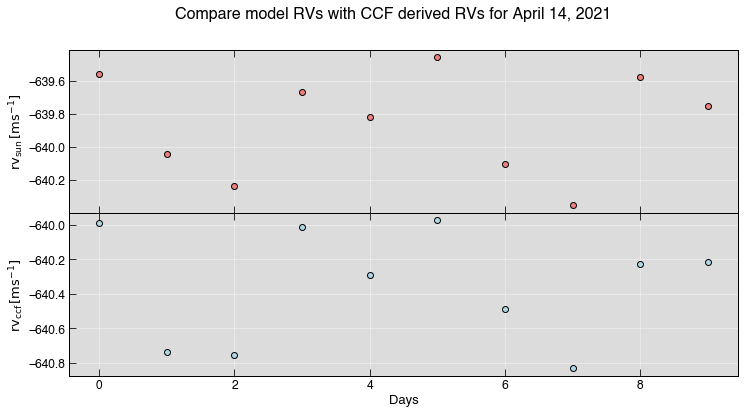

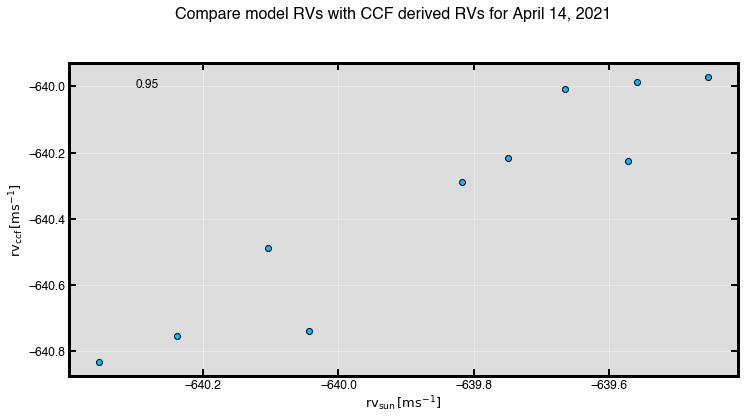

In [71]:
# compare the RVs for a full day of observations

# get CCFs and RVs from pickle file
pickle_csv = os.path.join(CsvDir.CCFS, 'day.csv')
fpickle = pd.read_pickle(pickle_csv)
dates = fpickle.dates.values
ccf_list = fpickle.ccf.values
rv_sun = fpickle.rv_model.values
rv_error = fpickle.rv_error.values
gaussian = fpickle.gaussian.values
rv_gauss = fpickle.rv_gauss.values

# find bad CCFs -- need to figure out why this is...
bad_ccfs = np.array([np.isnan(ccf[0]) for ccf in ccf_list])
ccf_list = ccf_list[~bad_ccfs]
rv_sun = rv_sun[~bad_ccfs]
rv_error = rv_error[~bad_ccfs]
gaussian = gaussian[~bad_ccfs]
rv_gauss = rv_gauss[~bad_ccfs]
dates = dates[~bad_ccfs]

# get other gaussian parameters
FWHM = [g.fwhm for g in gaussian]
amplitude = [g.amplitude for g in gaussian]
sigma = [g.stddev for g in gaussian]

# plot results
x = range(len(dates))
y_list = [rv_sun*1e3, rv_gauss*1e3]
title = 'Compare model RVs with CCF derived RVs for April 14, 2021'
xlabel = 'Days'
ylabel_list = [r'$\rm rv_{\rm sun}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$']
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)


plot.correlation_plot(rv_sun*1e3, rv_gauss*1e3, 'Compare model RVs with CCF derived RVs for April 14, 2021', r'$\rm rv_{\rm sun}\/[m s ^{-1}]$', r'$\rm rv_{\rm ccf}\/[m s ^{-1}]$')
